In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [73]:
csvs = ["simple.csv", "strassen.csv", "transpuesta.csv"]
folders = ["cuadradas", "rectangulares"]
folder_name = ["Cuadradas", "Rectangulares"]
nombres = ["simple", "strassen", "transpuesta"]
colores = ["#fd7f6f", "#ffb55a", "#7eb0d5", "#bd7ebe"]

In [74]:
GREY10 = "#1a1a1a"
GREY30 = "#4d4d4d"
GREY40 = "#666666"
GREY50 = "#7f7f7f"
GREY60 = "#999999"
GREY75 = "#bfbfbf"
GREY91 = "#e8e8e8"
GREY98 = "#fafafa"

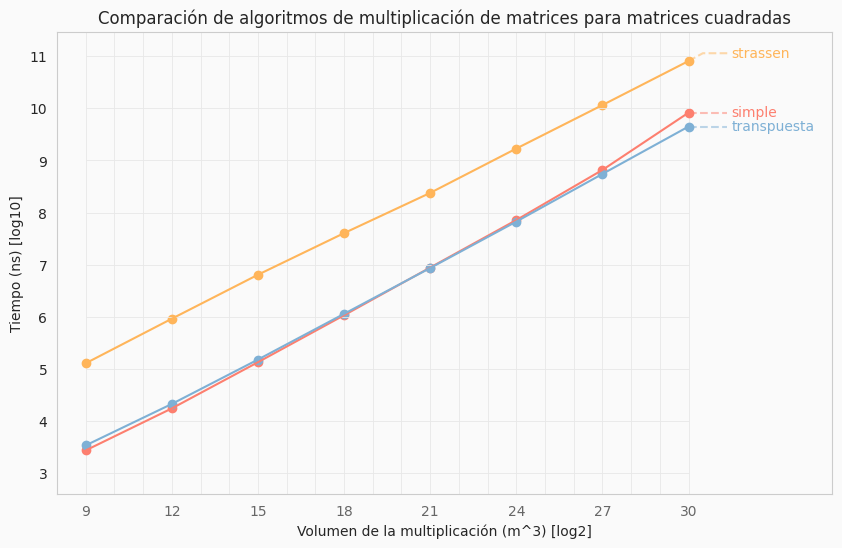

In [75]:
fig, ax = plt.subplots(figsize=(10, 6))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

plt.grid(False)

VLINES = np.arange(9,31,1)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(3, 12), xmin=9, xmax=30, color=GREY91, lw=0.6)

offsets = [0,0.15,0,-0.12]

PAD = 0.5
for file in range(len(csvs)):
    data = pd.read_csv("/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/cuadradas/" + csvs[file])
    
    
    data["Tiempo"] = np.log10(data["Tiempo"])
    data["Tamaño"] = np.log2(data["n1"] * data["n2"] * data["n4"])
    
    data = data.groupby("Tamaño").mean()
    
    x_start = data.index[-1]
    x_end = x_start + 3*PAD
    y_start = data["Tiempo"].iloc[-1]
    y_end = data["Tiempo"].iloc[-1] + offsets[file]
    
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - 0.3*PAD], 
        [y_start, y_end, y_end], 
        color=colores[file], 
        alpha=0.5, 
        ls="dashed"
    )
    
    ax.text(
        x_end, 
        y_end, 
        nombres[file], 
        color=colores[file], 
        fontsize=10, 
        va="center"
    )
    
    ax.plot(data.index, data["Tiempo"], color=colores[file])
    ax.scatter(data.index, data["Tiempo"], color=colores[file])
        

ax.set_xticks([x for x in np.arange(9, 31, 3)])
ax.set_xticklabels(
    [x for x in np.arange(9, 31, 3)], 
    fontsize=10,
    weight=500,
    color=GREY40
)
ax.set_xlim(8, 35)

plt.xlabel("Volumen de la multiplicación (m^3) [log2]")
plt.ylabel("Tiempo (ns) [log10]")
plt.title("Comparación de algoritmos de multiplicación de matrices para matrices cuadradas")
plt.savefig("/home/marcor/CLionProjects/tarea1-INF221/matrices/graficos/comparacion_cuadradas.png",
            dpi=300, bbox_inches="tight")

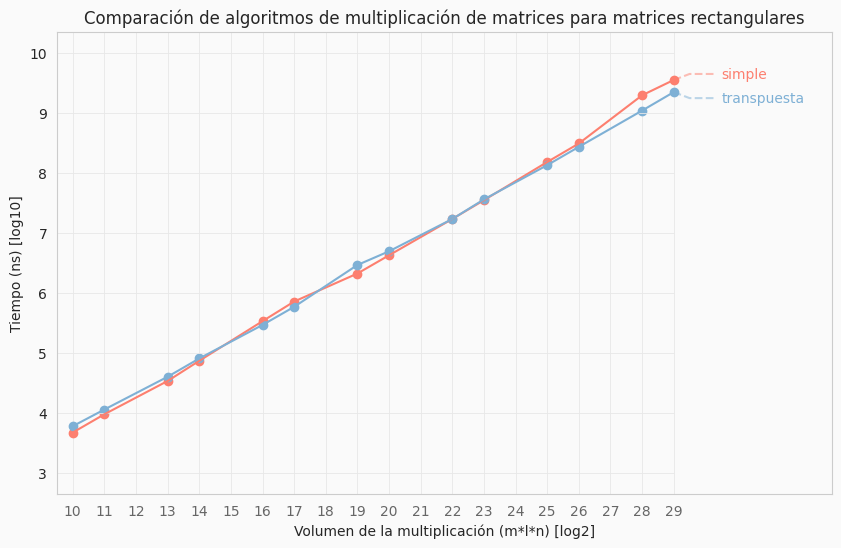

In [76]:
fig, ax = plt.subplots(figsize=(10, 6))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

plt.grid(False)

VLINES = np.arange(10,30,1)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(3, 11), xmin=9.5, xmax=29, color=GREY91, lw=0.6)

offsets = [0.1,0,-0.1,0]

PAD = 0.5
for file in range(len(csvs)):
    if csvs[file] == "strassen.csv":
        continue
    data = pd.read_csv("/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/rectangulares/" + csvs[file])
    
    
    data["Tiempo"] = np.log10(data["Tiempo"])
    data["Tamaño"] = np.log2(data["n1"] * data["n2"] * data["n4"])
    
    data = data.groupby("Tamaño").mean()
    
    x_start = data.index[-1]
    x_end = x_start + 3*PAD
    y_start = data["Tiempo"].iloc[-1]
    y_end = data["Tiempo"].iloc[-1] + offsets[file]
    
    ax.plot(
        [x_start, (x_start + x_end - PAD) / 2 , x_end - 0.3*PAD], 
        [y_start, y_end, y_end], 
        color=colores[file], 
        alpha=0.5, 
        ls="dashed"
    )
    
    ax.text(
        x_end, 
        y_end, 
        nombres[file], 
        color=colores[file], 
        fontsize=10, 
        va="center"
    )
    
    ax.plot(data.index, data["Tiempo"], color=colores[file])
    ax.scatter(data.index, data["Tiempo"], color=colores[file])
        

ax.set_xticks([x for x in np.arange(10, 30, 1)])
ax.set_xticklabels(
    [x for x in np.arange(10, 30, 1)], 
    fontsize=10,
    weight=500,
    color=GREY40
)
ax.set_xlim(9.5, 34)

plt.xlabel("Volumen de la multiplicación (m*l*n) [log2]")
plt.ylabel("Tiempo (ns) [log10]")
plt.title("Comparación de algoritmos de multiplicación de matrices para matrices rectangulares")
plt.savefig("/home/marcor/CLionProjects/tarea1-INF221/matrices/graficos/comparacion_rectangulares.png",
            dpi=300, bbox_inches="tight")

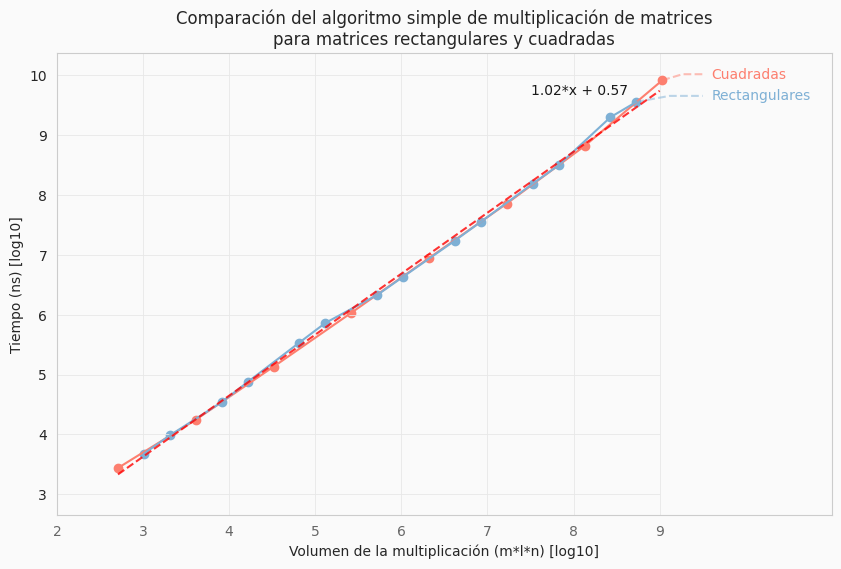

In [94]:
fig, ax = plt.subplots(figsize=(10, 6))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

plt.grid(False)

VLINES = np.arange(0,10,1)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(3, 11), xmin=0, xmax=9, color=GREY91, lw=0.6)

offsets = [0.1,0.1,-0.1,0]

PAD = 0.1
for folder in range(len(folders)):
    data = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/{folders[folder]}/simple.csv")
    
    
    data["Tiempo"] = np.log10(data["Tiempo"])
    data["Tamaño"] = np.log10(data["n1"] * data["n2"] * data["n4"])
    
    data = data.groupby("Tamaño").mean()
    
    x_start = data.index[-1]
    x_end = 9.5
    y_start = data["Tiempo"].iloc[-1]
    y_end = data["Tiempo"].iloc[-1] + offsets[folder]
    
    ax.plot(
        [x_start, (x_start + x_end) / 2 , x_end], 
        [y_start, y_end, y_end], 
        color=colores[folder*2], 
        alpha=0.5, 
        ls="dashed"
    )
    
    ax.text(
        x_end + PAD, 
        y_end, 
        folder_name[folder], 
        color=colores[folder*2], 
        fontsize=10, 
        va="center"
    )
    
    ax.plot(data.index, data["Tiempo"], color=colores[folder*2])
    ax.scatter(data.index, data["Tiempo"], color=colores[folder*2])
    
# Merge the two datasets
data_0 = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/cuadradas/simple.csv")
data_1 = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/rectangulares/simple.csv")

data = pd.concat([data_0, data_1])

data["Tiempo"] = np.log10(data["Tiempo"])
data["Tamaño"] = np.log10(data["n1"] * data["n2"] * data["n4"])

# Make a linear regression to find the slope
m, b = np.polyfit(data["Tamaño"], data["Tiempo"], 1)

x_start = data["Tamaño"].iloc[0]
x_end = 9
y_start = m * x_start + b
y_end = m * x_end + b

ax.plot(
    [x_start, x_end],
    [y_start, y_end],
    color="red",
    alpha=0.8,
    ls="dashed"
)

ax.text(
    x_end - 15 * PAD,
    y_end,
    f"{m:.2f}*x + {b:.2f}",
    color=GREY10,
    fontsize=10,
    va="center"
)
        

ax.set_xticks([x for x in np.arange(2, 10, 1)])
ax.set_xticklabels(
    [x for x in np.arange(2, 10, 1)], 
    fontsize=10,
    weight=500,
    color=GREY40
)
ax.set_xlim(2, 11)

plt.xlabel("Volumen de la multiplicación (m*l*n) [log10]")
plt.ylabel("Tiempo (ns) [log10]")
plt.title("Comparación del algoritmo simple de multiplicación de matrices\npara matrices rectangulares y cuadradas")
plt.savefig("/home/marcor/CLionProjects/tarea1-INF221/matrices/graficos/comparacion_simple.png",
            dpi=300, bbox_inches="tight")

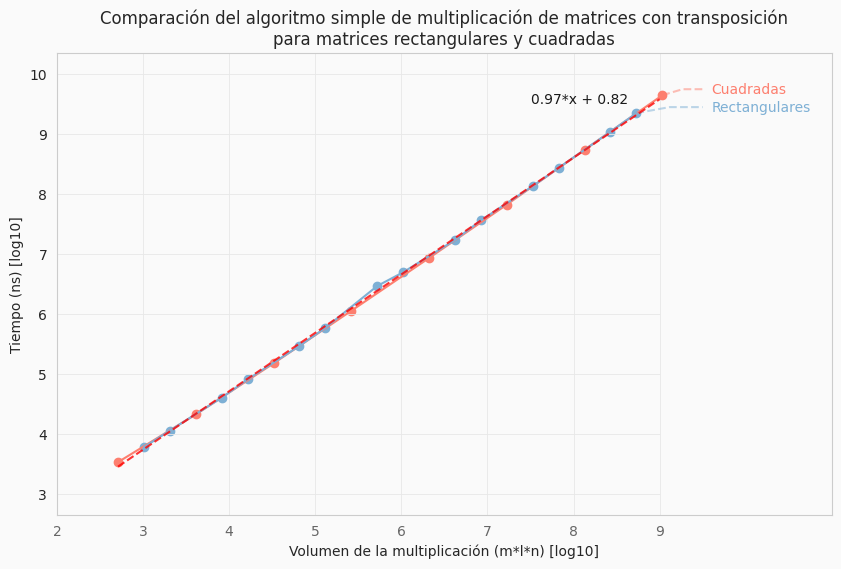

In [95]:
fig, ax = plt.subplots(figsize=(10, 6))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

plt.grid(False)

VLINES = np.arange(0,10,1)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(3, 11), xmin=0, xmax=9, color=GREY91, lw=0.6)

offsets = [0.1,0.1,-0.1,0]

PAD = 0.1
for folder in range(len(folders)):
    data = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/{folders[folder]}/transpuesta.csv")
    
    
    data["Tiempo"] = np.log10(data["Tiempo"])
    data["Tamaño"] = np.log10(data["n1"] * data["n2"] * data["n4"])
    
    data = data.groupby("Tamaño").mean()
    
    x_start = data.index[-1]
    x_end = 9.5
    y_start = data["Tiempo"].iloc[-1]
    y_end = data["Tiempo"].iloc[-1] + offsets[folder]
    
    ax.plot(
        [x_start, (x_start + x_end) / 2 , x_end], 
        [y_start, y_end, y_end], 
        color=colores[folder*2], 
        alpha=0.5, 
        ls="dashed"
    )
    
    ax.text(
        x_end + PAD, 
        y_end, 
        folder_name[folder], 
        color=colores[folder*2], 
        fontsize=10, 
        va="center"
    )
    
    ax.plot(data.index, data["Tiempo"], color=colores[folder*2])
    ax.scatter(data.index, data["Tiempo"], color=colores[folder*2])
    
# Merge the two datasets
data_0 = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/cuadradas/transpuesta.csv")
data_1 = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/rectangulares/transpuesta.csv")

data = pd.concat([data_0, data_1])

data["Tiempo"] = np.log10(data["Tiempo"])
data["Tamaño"] = np.log10(data["n1"] * data["n2"] * data["n4"])

# Make a linear regression to find the slope
m, b = np.polyfit(data["Tamaño"], data["Tiempo"], 1)

x_start = data["Tamaño"].iloc[0]
x_end = 9
y_start = m * x_start + b
y_end = m * x_end + b

ax.plot(
    [x_start, x_end],
    [y_start, y_end],
    color="red",
    alpha=0.8,
    ls="dashed"
)

ax.text(
    x_end - 15 * PAD,
    y_end,
    f"{m:.2f}*x + {b:.2f}",
    color=GREY10,
    fontsize=10,
    va="center"
)
        

ax.set_xticks([x for x in np.arange(2, 10, 1)])
ax.set_xticklabels(
    [x for x in np.arange(2, 10, 1)], 
    fontsize=10,
    weight=500,
    color=GREY40
)
ax.set_xlim(2, 11)

plt.xlabel("Volumen de la multiplicación (m*l*n) [log10]")
plt.ylabel("Tiempo (ns) [log10]")
plt.title("Comparación del algoritmo simple de multiplicación de matrices con transposición\npara matrices rectangulares y cuadradas")
plt.savefig("/home/marcor/CLionProjects/tarea1-INF221/matrices/graficos/comparacion_transpuesta.png",
            dpi=300, bbox_inches="tight")

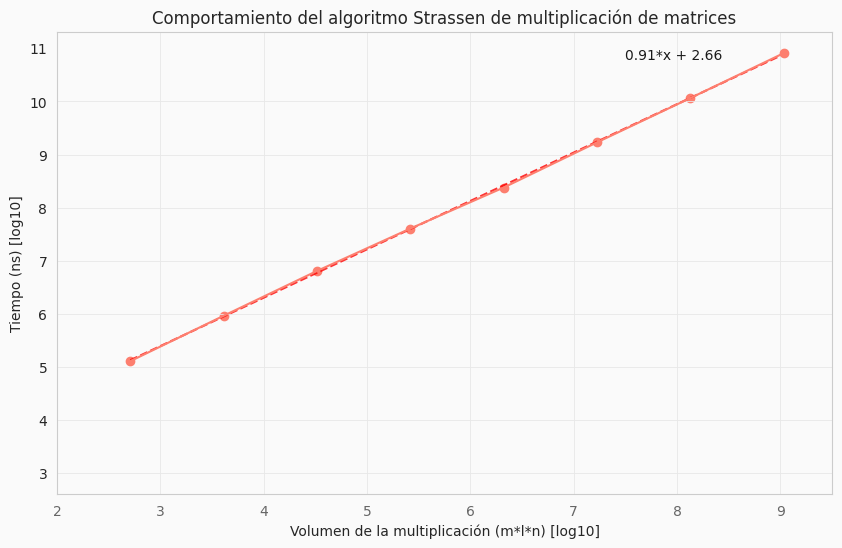

In [101]:
fig, ax = plt.subplots(figsize=(10, 6))

# Background color
fig.patch.set_facecolor(GREY98)
ax.set_facecolor(GREY98)

plt.grid(False)

VLINES = np.arange(0,10,1)

# Vertical lines used as scale reference
for h in VLINES:
    ax.axvline(h, color=GREY91, lw=0.6, zorder=0)

# Horizontal lines
ax.hlines(y=np.arange(3, 11), xmin=0, xmax=9.5, color=GREY91, lw=0.6)

offsets = [0.1,0.1,-0.1,0]

PAD = 0.1
folder = 0
    
# Merge the two datasets
data = pd.read_csv(f"/home/marcor/CLionProjects/tarea1-INF221/matrices/dataset/resultados/cuadradas/strassen.csv")
data["Tiempo"] = np.log10(data["Tiempo"])
data["Tamaño"] = np.log10(data["n1"] * data["n2"] * data["n4"])



# Make a linear regression to find the slope
m, b = np.polyfit(data["Tamaño"], data["Tiempo"], 1)

x_start = data["Tamaño"].iloc[0]
x_end = 9
y_start = m * x_start + b
y_end = m * x_end + b

ax.plot(
    [x_start, x_end],
    [y_start, y_end],
    color="red",
    alpha=0.8,
    ls="dashed"
)

ax.text(
    x_end - 15 * PAD,
    y_end,
    f"{m:.2f}*x + {b:.2f}",
    color=GREY10,
    fontsize=10,
    va="center"
)
        
data = data.groupby("Tamaño").mean()        
        
ax.plot(data.index, data["Tiempo"], color=colores[folder*2])
ax.scatter(data.index, data["Tiempo"], color=colores[folder*2])

ax.set_xticks([x for x in np.arange(2, 10, 1)])
ax.set_xticklabels(
    [x for x in np.arange(2, 10, 1)], 
    fontsize=10,
    weight=500,
    color=GREY40
)
ax.set_xlim(2, 9.5)

plt.xlabel("Volumen de la multiplicación (m*l*n) [log10]")
plt.ylabel("Tiempo (ns) [log10]")
plt.title("Comportamiento del algoritmo Strassen de multiplicación de matrices")
plt.savefig("/home/marcor/CLionProjects/tarea1-INF221/matrices/graficos/comparacion_strassen.png",
            dpi=300, bbox_inches="tight")